# 데이터 병합

In [729]:
import pandas as pd
import numpy as np

In [730]:
df_a = pd.DataFrame({'key':['a','b','c','d','e'],'num_a':[1,2,3,4,5]})

In [731]:
df_a

,key,num_a
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5


In [732]:
df_b = pd.DataFrame({'key':['a','b','d','f','g'],'num_b':[11,15,35,45,55]})

In [733]:
df_b

,key,num_b
0,a,11
1,b,15
2,d,35
3,f,45
4,g,55


In [734]:
df_c = pd.DataFrame({'key':['f','g','h','i','j'],'num_c':[6,7,8,9,0]})

In [735]:
df_c

,key,num_c
0,f,6
1,g,7
2,h,8
3,i,9
4,j,0


In [736]:
# 데이터 위아래로 합치기
pd.concat([df_a,df_b])

,key,num_a,num_b
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,a,NaN,11.0
1,b,NaN,15.0
2,d,NaN,35.0
3,f,NaN,45.0
4,g,NaN,55.0


In [737]:
pd.concat([df_a,df_c])

,key,num_a,num_c
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,f,NaN,6.0
1,g,NaN,7.0
2,h,NaN,8.0
3,i,NaN,9.0
4,j,NaN,0.0


In [738]:
pd.concat([df_a,df_b,df_c])

,key,num_a,num_b,num_c
0,a,1.0,NaN,NaN
1,b,2.0,NaN,NaN
2,c,3.0,NaN,NaN
3,d,4.0,NaN,NaN
4,e,5.0,NaN,NaN
0,a,NaN,11.0,NaN
1,b,NaN,15.0,NaN
2,d,NaN,35.0,NaN
3,f,NaN,45.0,NaN
4,g,NaN,55.0,NaN


In [739]:
# 옆으로 데이터 병합
pd.concat([df_a,df_b],axis=1)

,key,num_a,key,num_b
0,a,1,a,11
1,b,2,b,15
2,c,3,d,35
3,d,4,f,45
4,e,5,g,55




*   Inner Join: 공통된 값만 추려서 합침
*   Outer Join: 공통되지 않은 키값도 전부 합쳐짐

*  Left Join: 왼쪽 데이터 기반, 왼쪽 데이터들은 모두 들어가고 오른쪽은 겹치는 것만

*  Right Join: 오른쪽 데이터 기반, 오른쪽 데이터들은 모두 들어가고 왼쪽은 겹치는 것만







In [740]:
# merge: 옆으로 합칠 때 많이 씀
# 공통된 key 값을 기준으로 출력됨
df_a.merge(df_b)

,key,num_a,num_b
0,a,1,11
1,b,2,15
2,d,4,35


In [741]:
# Inner Join
df_a.merge(df_b, how='inner')

,key,num_a,num_b
0,a,1,11
1,b,2,15
2,d,4,35


In [742]:
# Outer Join
df_a.merge(df_b, how='outer')

,key,num_a,num_b
0,a,1.0,11.0
1,b,2.0,15.0
2,c,3.0,NaN
3,d,4.0,35.0
4,e,5.0,NaN
5,f,NaN,45.0
6,g,NaN,55.0


In [743]:
# Left Join
df_a.merge(df_b, how='left')

,key,num_a,num_b
0,a,1,11.0
1,b,2,15.0
2,c,3,NaN
3,d,4,35.0
4,e,5,NaN


In [744]:
# Right Join
df_a.merge(df_b, how='right')

,key,num_a,num_b
0,a,1.0,11
1,b,2.0,15
2,d,4.0,35
3,f,NaN,45
4,g,NaN,55


In [745]:
# Right Join
# on: 기준이 되는 키
df_a.merge(df_b, on='key', how='right')

,key,num_a,num_b
0,a,1.0,11
1,b,2.0,15
2,d,4.0,35
3,f,NaN,45
4,g,NaN,55


In [746]:
df_a = pd.DataFrame({'key':['a','b','c','d','e'], 'id':['q','w','e','r','t'], 'num_a':[1,2,3,4,5]})
df_b = pd.DataFrame({'key':['a','b','d','f','g'],'id':['q','w','z','x','y'],'num_b':[11,15,35,45,55]})

In [747]:
# key값을 기준으로 겹치는 key값만 출력
df_a.merge(df_b, on='key')

,key,id_x,num_a,id_y,num_b
0,a,q,1,q,11
1,b,w,2,w,15
2,d,r,4,z,35


In [748]:
df_a = pd.DataFrame({'key':['a','b','c','d','e'], 'num_a':[1,2,3,4,5]})
df_b = pd.DataFrame({'id':['a','b','d','f','g'],'num_b':[11,15,35,45,55]})

In [749]:
# 각 데이터의 on에 들어가는 값이 다를 때
df_a.merge(df_b,left_on='key',right_on='id', how='outer')

,key,num_a,id,num_b
0,a,1.0,a,11.0
1,b,2.0,b,15.0
2,c,3.0,NaN,NaN
3,d,4.0,d,35.0
4,e,5.0,NaN,NaN
5,NaN,NaN,f,45.0
6,NaN,NaN,g,55.0


In [750]:
df_a = pd.DataFrame({'key':['a','b','c','d','e'], 'num_a':[1,2,3,4,5]})
df_b = pd.DataFrame({'key':['a','b','d','f','g'],'num_b':[11,15,35,45,55]})

In [751]:
# join은 인덱스를 기준으로 합침
df_a.join(df_b,lsuffix='_a',rsuffix='_b')

,key_a,num_a,key_b,num_b
0,a,1,a,11
1,b,2,b,15
2,c,3,d,35
3,d,4,f,45
4,e,5,g,55


In [752]:
# 데이터의 공통된 key값을 기준으로 join을 사용해 데이터 병합할 때
# 인덱스를 키로 바꿔줌
df_a = df_a.set_index('key')

In [753]:
df_b = df_b.set_index('key')

In [754]:
# suffix를 해주지 않아도 key를 기준으로 합쳐줌
df_a.join(df_b, how='inner')

,num_a,num_b
key,,
a,1,11
b,2,15
d,4,35


총정리

concat:위아래로 합침, axis=1을 활용하면 양옆으로 합치는 것도 가능함

merge:key column을 가지고 합침

join: 인덱스를 기준으로 합침

In [755]:
salary_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salary_1.csv')
salary_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salary_2.csv')

In [756]:
salary_1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0


In [757]:
salary_2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,29,Female,1,Human Resources Coordinator,2,45000,China,Chinese,0
1,23,Male,0,Sales Associate,1,25000,USA,Asian,0
2,32,Female,2,Software Developer,7,90000,USA,African American,0
3,44,Male,1,Operations Manager,18,170000,USA,Hispanic,0
4,26,Female,1,Marketing Coordinator,2,40000,Canada,Asian,0


In [758]:
# 데이터 합치기
salary_df = pd.concat([salary_1, salary_2])

In [759]:
# 두 데이터의 인덱스가 동일
salary_df.loc[0]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
0,29.0,Female,1,Human Resources Coordinator,2.0,45000,China,Chinese,0


In [760]:
# 인덱스 리셋
salary_df.reset_index(drop=True)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [761]:
# 국가별 물가지수
cpi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cpi.csv')

In [762]:
cpi.head()

,Country,Reference,Last,Previous,Units,Frequency
0,United States,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
1,China,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly
2,Germany,Sep-23,117.9,117.5,"Index 2020=100, CDASA",Monthly
3,France,Sep-23,118.52,118.2,"Index 2015=100, SA",Monthly
4,United Kingdom,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly


In [763]:
# country 이름 통일시키기
salary_df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [764]:
cpi['Country'].unique()

array(['United States', 'China', 'Germany', 'France', 'United Kingdom',
       'Brazil', 'Italy', 'Russian Federation', 'Canada', 'Australia',
       'Spain', 'South Korea', 'Mexico', 'Indonesia', 'Netherlands'],
      dtype=object)

In [765]:
cpi['Country'] = cpi['Country'].replace({'United States':'USA','United Kingdom':'UK'})

In [766]:
salary_df = salary_df.merge(cpi, on='Country', how='left')

In [767]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Reference,Last,Previous,Units,Frequency
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,Sep-23,158.7,158.4,"Index 2002=100, SA",Monthly
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly


In [768]:
# 컬럼 지우기
salary_df.drop(['Reference','Previous','Units','Frequency'],axis=1)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Last
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.3
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100


In [769]:
salary_df.drop(['Reference','Previous','Units','Frequency'],axis=1, inplace=True)

In [770]:
# Last 컬럼명 바꾸기
# axis=1를 써주지 않으면 인덱스 이름에서 찾음
salary_df = salary_df.rename({'Last':'CPI'},axis=1)

In [771]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


# 결측치&이상치, 집계 및 그룹화, 피벗테이블

In [772]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
 9   CPI                  6684 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 522.3+ KB


In [773]:
# CPI 컬럼 object -> float으로 바꾸기
salary_df['CPI'] = pd.to_numeric(salary_df['CPI'])

In [774]:
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6680.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.00000
mean,33.611527,1.622382,8.084007,115307.175194,0.143477,167.12953
std,7.595506,0.880474,6.097824,52806.810881,0.350585,73.22657
min,21.000000,0.000000,-1.000000,350.000000,0.000000,100.00000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.00000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.30000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.70000
max,62.000000,3.000000,82.000000,250000.000000,1.000000,307.48000


In [775]:
# 결측치 확인
salary_df.isna().sum()

,0
Age,4
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0
Country,0
Race,0
Senior,0
CPI,0


In [776]:
# Age의 결측치 확인
salary_df[salary_df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
548,NaN,Male,1,Data Analyst,3.0,130000,Canada,White,0,158.70
2135,NaN,Female,3,Project Engineer,16.0,190000,USA,African American,1,307.48
2749,NaN,Female,1,Software Engineer,1.0,50000,Australia,White,0,135.30
3826,NaN,Female,2,Marketing Coordinator,8.0,85000,UK,Asian,0,132.00


In [777]:
# 결측치 있는 행 지우기
salary_df['Age'] = salary_df['Age'].dropna()

In [778]:
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100.00
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100.00


In [779]:
# Year 컬럼의 이상치 확인
salary_df = salary_df[salary_df['Years of Experience'] != -1]

In [780]:
salary_df['Years of Experience'].sort_values()

,Years of Experience
18,0.0
6235,0.0
6221,0.0
6207,0.0
6179,0.0
...,...
2504,33.0
2429,33.0
2415,34.0
2490,34.0


In [781]:
salary_df[salary_df['Years of Experience'] == 82]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3


In [782]:
# 나이보다 경력이 많은 경우
# 보통 18세부터 일을 시작하기 때문에
# ~: True와 False를 반대로
salary_df = salary_df[~(salary_df['Years of Experience'] > salary_df['Age'] - 18)]

In [783]:
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6674.000000,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000
mean,33.612826,1.622192,8.075846,115293.477239,0.143157,167.174480
std,7.594369,0.880436,6.029666,52819.069371,0.350259,73.242296
min,21.000000,0.000000,0.000000,350.000000,0.000000,100.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.300000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.700000
max,62.000000,3.000000,34.000000,250000.000000,1.000000,307.480000


In [784]:
# Years of Experience이 0인 값
salary_df[salary_df['Years of Experience'] == 0]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
18,25.0,Female,1,Data Entry Clerk,0.0,35000,UK,Asian,0,132.00
49,25.0,Male,1,Help Desk Analyst,0.0,35000,USA,Asian,0,307.48
82,25.0,Male,1,Sales Representative,0.0,30000,Australia,Asian,0,135.30
2416,24.0,Male,2,Back end Developer,0.0,55538,USA,Asian,0,307.48
2430,22.0,Female,0,Back end Developer,0.0,51832,UK,White,0,132.00
...,...,...,...,...,...,...,...,...,...,...
6179,24.0,Female,0,Receptionist,0.0,25000,China,White,0,100.00
6193,24.0,Female,0,Receptionist,0.0,25000,Australia,Australian,0,135.30
6207,24.0,Female,0,Receptionist,0.0,25000,Australia,White,0,135.30
6221,24.0,Female,0,Receptionist,0.0,25000,UK,Welsh,0,132.00


In [785]:
salary_df[salary_df['Gender'] == 'Male']['Salary'].mean()

np.float64(121385.40714480502)

In [786]:
salary_df[salary_df['Gender'] == 'Female']['Salary'].mean()

np.float64(107874.31185652607)

In [787]:
salary_df.groupby('Gender').max()

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
Gender,,,,,,,,,
Female,60.0,3,Web Developer,34.0,220000,USA,White,1,307.48
Male,62.0,3,Web Developer,32.0,250000,USA,White,1,307.48


In [788]:
# 젠더 별 salary의 평균
salary_df.groupby('Gender')['Salary'].max()

,Salary
Gender,
Female,220000
Male,250000


In [789]:
# Gender와 Country 별 Salary의 평균
salary_df.groupby(['Gender','Country'])['Salary'].mean()

Gender  Country  
Female  Australia    107841.387255
        Canada       106884.711340
        China        111291.211506
        UK           108456.692939
        USA          104992.690438
Male    Australia    120896.764216
        Canada       123982.064865
        China        120135.522148
        UK           122244.048476
        USA          119683.120433
Name: Salary, dtype: float64

In [790]:
# Gender와 Country 별 Salary의 평균
salary_df.groupby(['Gender','Country'])['Salary'].mean().reset_index()

,Gender,Country,Salary
0,Female,Australia,107841.387255
1,Female,Canada,106884.711340
2,Female,China,111291.211506
3,Female,UK,108456.692939
4,Female,USA,104992.690438
5,Male,Australia,120896.764216
6,Male,Canada,123982.064865
7,Male,China,120135.522148
8,Male,UK,122244.048476
9,Male,USA,119683.120433


In [791]:
# agg 함수 사용해 sum과 mean 한번에 구하기
salary_df.groupby('Gender')['Salary'].agg(['sum','mean'])

,sum,mean
Gender,,
Female,324809553,107874.311857
Male,445120288,121385.407145


In [792]:
# 피벗테이블 만들기
pd.pivot_table(salary_df, index='Gender', columns='Country', values='Salary', aggfunc='mean')

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107841.387255,106884.711340,111291.211506,108456.692939,104992.690438
Male,120896.764216,123982.064865,120135.522148,122244.048476,119683.120433


In [793]:
pd.pivot_table(salary_df, index=['Gender', 'Race'], columns='Country', values='Salary', aggfunc='mean')

Country                      Australia         Canada          China  \
Gender Race                                                            
Female African American            NaN            NaN            NaN   
       Asian             107715.561905  105812.939394            NaN   
       Australian        108245.014354            NaN            NaN   
       Black                       NaN  108602.208333            NaN   
       Chinese                     NaN            NaN  106422.709184   
       Hispanic                    NaN            NaN            NaN   
       Korean                      NaN            NaN  110948.144186   
       Mixed                       NaN            NaN            NaN   
       Welsh                       NaN            NaN            NaN   
       White             107541.207254  106272.479167  117002.244444   
Male   African American            NaN            NaN            NaN   
       Asian             119691.533835  122360.988327            NaN   
       Australian        119390.000000            NaN            NaN   
       Black                       NaN  126169.440329            NaN   
       Chinese                     NaN            NaN  114959.159184   
       Hispanic                    NaN            NaN            NaN   
       Korean                      NaN            NaN  122565.033058   
       Mixed                       NaN            NaN            NaN   
       Welsh                       NaN            NaN            NaN   
       White             124136.080189  123503.250000  122772.217054   

Country                             UK            USA  
Gender Race                                            
Female African American            NaN  103568.139073  
       Asian             106835.865248  104991.940120  
       Australian                  NaN            NaN  
       Black                       NaN            NaN  
       Chinese                     NaN            NaN  
       Hispanic                    NaN  104509.158273  
       Korean                      NaN            NaN  
       Mixed             108091.310345            NaN  
       Welsh             108379.775758            NaN  
       White             110318.772152  106757.962500  
Male   African American            NaN  118956.572139  
       Asian             127269.465969  121556.553571  
       Australian                  NaN            NaN  
       Black                       NaN            NaN  
       Chinese                     NaN            NaN  
       Hispanic                    NaN  114892.306011  
       Korean                      NaN            NaN  
       Mixed             122652.206349            NaN  
       Welsh             116666.857143            NaN  
       White             121669.172414  123469.315508

In [794]:
sales_df = pd.DataFrame({'company':['a','a','a','a','b','b','b','b'],
              'quarter': ['q1','q2','q3','q4','q1','q2','q3','q4'],
              'sales':[111,222,333,444,555,666,777,888]})

In [795]:
sales_temp = pd.pivot(sales_df, index='company',columns='quarter',values='sales')

In [796]:
sales_temp

quarter,q1,q2,q3,q4
company,,,,
a,111,222,333,444
b,555,666,777,888


# 로그(Log), 원-핫 인코딩

In [797]:
import numpy as np

In [798]:
price_df = pd.DataFrame({'level':[1,2,3,4,5,6,7],
              'price':[1,10,100,1000,10000,100000,1000000]})

In [799]:
price_df

,level,price
0,1,1
1,2,10
2,3,100
3,4,1000
4,5,10000
5,6,100000
6,7,1000000


In [800]:
import seaborn as sns

<Axes: xlabel='level', ylabel='price'>

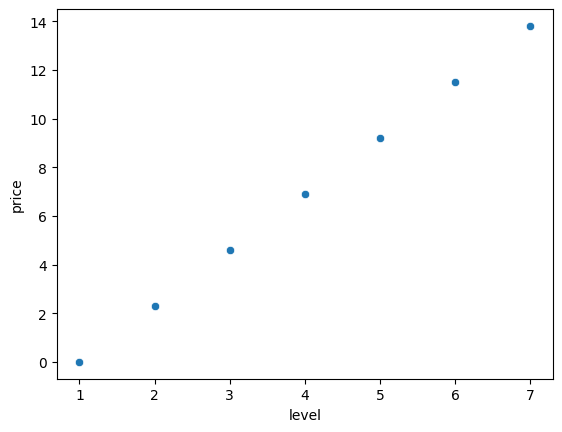

In [801]:
# 로그 활용해 선형관계를 만들어줌
sns.scatterplot(x = price_df['level'], y = np.log(price_df['price']))

In [802]:
# 되돌려놓기
np.log(55)
np.exp(4.007333185232471)

np.float64(55.000000000000014)

In [803]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


원핫인코딩

단순히 Red=1, Green=2, Blue=3으로 하면, 숫자 사이에 순서/크기 의미가 생겨버림 (모델이 Blue > Green > Red로 오해할 수 있음).


따라서 순서가 없는 범주형 데이터는 각 값을 0과 1로 구분된 벡터로 변환해야 함.

In [804]:
# 원핫인코딩
# 남성은 1, 여성은 0
pd.get_dummies(salary_df, columns=['Gender'])

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Female,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,False,True
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,True,False
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,False,True
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,True,False
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,True,False
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,False,True
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,True,False
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,False,True


In [805]:
# 첫 번째 없애주기
# Gender_female 사라짐
pd.get_dummies(salary_df, columns=['Gender'], drop_first=True)

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,True
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,False
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,True
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,False
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,True
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,False
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,True
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,False
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,True


In [806]:
# 각각의 컬럼의 고유값이 몇 개인지 확인
# Job Title이 너무 많음
salary_df[['Gender','Country','Race','Job Title']].nunique()

,0
Gender,2
Country,5
Race,10
Job Title,129


In [807]:
salary_df['Job Title'].value_counts().tail(20)

,count
Job Title,
Technical Recruiter,1
Public Relations Manager,1
Chief Data Officer,1
Digital Content Producer,1
Principal Scientist,1
Designer,1
Supply Chain Manager,1
Director of Product Management,1
HR Specialist,1


In [808]:
job = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/job.csv')

In [809]:
# merge 로 데이터 합쳐줌. key 값을 기준으로 합칠 때는 merge
# Job 이라는 새로운 컬럼이 생긴 것을 확인
salary_df = salary_df.merge(job, on='Job Title', how='left')

In [810]:
# Job Title 컬럼 지우기
salary_df.drop('Job Title', axis=1, inplace=True)

In [811]:
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director


In [812]:
# 몇 개의 고유값이 있는지 확인
salary_df['Jobs'].nunique()

60

In [813]:
# 디테일한 값을 확인할 때는
salary_df['Jobs'].value_counts()

,count
Jobs,
Software,2157
Marketing,1000
Data Scientist,572
Sales,453
HR,420
Data Analyst,390
Product Manager,325
Project Engineer,317
Financial,200


In [814]:
# 원앤핫코딩
salary_df = pd.get_dummies(salary_df, columns=['Gender','Country','Race','Jobs'], drop_first=True)

# 스케일링
데이터의 범위를 조정하는 과정

Standard Scaling: 평균 0, 분산 1인 형태로 데이터를 재배열

Robust Scaling: Standard Scaling과 비슷하나, 아웃라이어의 영향x

Mix-Max Scaling: 최댓값이 1, 최소값이 0인 형태로 재배열

스케일링 언제 사용하나: 각 변수의 크기가 중요하게 작용할 때

In [815]:
salary_df['Age'].mean()

np.float64(33.61282589151933)

In [816]:
salary_df['Age'].std()

7.594369005848066

In [817]:
 # Standard Scaling 계산
(salary_df['Age'] - salary_df['Age'].mean()) / salary_df['Age'].std()

,Age
0,-0.212371
1,-0.739077
2,1.499423
3,0.314335
4,2.421159
...,...
6673,2.026129
6674,-0.212371
6675,-0.475724
6676,1.631100


In [818]:
salary_df['Age'].quantile(0.75)

np.float64(38.0)

In [819]:
# Robust Scaling으로 변환
(salary_df['Age'] - salary_df['Age'].quantile(0.75)) / (salary_df['Age'].quantile(0.75) - salary_df['Age'].quantile(0.25))

,Age
0,-0.6
1,-1.0
2,0.7
3,-0.2
4,1.4
...,...
6673,1.1
6674,-0.6
6675,-0.8
6676,0.8


In [820]:
salary_df['Age'].min()

21.0

In [821]:
salary_df['Age'].max()

62.0

In [822]:
# MinMax Scaling
(salary_df['Age'] - salary_df['Age'].min()) / (salary_df['Age'].max()-salary_df['Age'].min())

,Age
0,0.268293
1,0.170732
2,0.585366
3,0.365854
4,0.756098
...,...
6673,0.682927
6674,0.268293
6675,0.219512
6676,0.609756


In [823]:
salary_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,28.0,2,3.0,65000,0,307.48,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,3,15.0,150000,1,158.70,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,1,7.0,60000,0,307.48,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,2,20.0,200000,0,307.48,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [824]:
# 스케일링을 자동적으로 해주는 라이브러리
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [825]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [826]:
ss.fit(salary_df)

StandardScaler()

In [827]:
# StandardScaler 후 데이터 형태로 만들기
# 컬럼 이름이 사라짐 -> 컬럼 이름 넣어줘야 함
ss_df = pd.DataFrame(ss.transform(salary_df), columns = salary_df.columns)

In [828]:
rs.fit(salary_df)

RobustScaler()

In [829]:
# RobustScaler()
rs_df = pd.DataFrame(rs.transform(salary_df), columns=salary_df.columns)

In [830]:
mm.fit(salary_df)

MinMaxScaler()

In [831]:
mm_df = pd.DataFrame(mm.transform(salary_df), columns=salary_df.columns)

# 주성분 분석(PCA)

In [832]:
from sklearn.decomposition import PCA

In [833]:
pca = PCA()

In [835]:
salary_df = salary_df.dropna()  # 결측치 제거

In [836]:
pca.fit(salary_df)

PCA()

In [839]:
pd.DataFrame(pca.transform(salary_df))

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-25294.401449,-35.927515,0.421192,-1.180524,-0.539384,-0.180507,0.681375,0.184226,1.002788,-0.353779,...,0.000790,0.001080,0.000709,0.000634,0.001002,-0.001531,0.001945,0.001446,0.000183,7.482620e-07
1,-50294.407066,138.806380,-0.333187,-0.224362,0.958083,-0.241859,-0.241185,-0.383320,-0.143392,-0.010515,...,0.000600,-0.001072,0.000971,-0.000299,-0.000647,-0.000817,0.001051,0.000654,-0.001228,9.859532e-07
2,34705.599441,-7.432077,8.552416,-1.092177,0.704549,-0.298237,0.195463,1.195063,-0.003916,-0.012052,...,0.003878,0.000052,0.001758,-0.001540,0.000595,0.000873,0.003025,-0.001198,0.027325,-4.102107e-05
3,-55294.405818,138.644191,9.233644,-1.028194,-0.255635,-0.216322,-0.515753,-0.434515,-0.106573,0.012223,...,0.000358,-0.000766,0.000658,0.000070,0.000106,-0.000526,0.000420,-0.000550,-0.001362,6.333579e-07
4,84705.595635,142.853086,10.357471,-1.719041,-0.880828,0.481965,-0.161034,-0.207667,-0.462547,-0.233319,...,0.025741,-0.089767,0.219939,-0.278301,0.095308,0.458073,0.279990,0.498162,0.079949,1.076327e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,84705.600608,-32.627228,7.654235,-0.031748,0.428731,0.296013,-0.823992,-0.544413,0.631546,-0.487361,...,-0.001327,-0.001390,-0.001391,0.001188,0.000953,0.000819,-0.000123,-0.000980,-0.001808,-7.092101e-07
6670,-65294.401335,-33.835290,4.861691,-1.979699,-1.185291,0.089906,-0.103539,0.063824,-0.378510,-0.455633,...,-0.000667,0.001149,-0.000034,0.000448,-0.000200,-0.000130,0.000018,-0.000445,0.000067,2.495706e-07
6671,-60294.400430,-68.984421,3.005404,-0.147405,0.009182,-0.480902,-0.366391,-0.660713,-0.521658,0.279341,...,0.000397,-0.000384,0.000855,-0.000368,-0.000601,-0.000802,0.000800,0.000710,0.000473,3.462610e-07
6672,24705.601309,-66.436829,10.132645,-2.191822,-0.216633,-0.434056,-0.145219,-0.433334,-0.897425,-0.204442,...,0.000065,0.001041,-0.001216,-0.000313,-0.000310,-0.000829,-0.000067,-0.000991,-0.000478,-6.106960e-08


In [840]:
# 두 개의 주성분만
pca = PCA(2)

In [843]:
pd.DataFrame(pca.fit_transform(salary_df), columns = ['PC1', 'PC2'])

,PC1,PC2
0,-25294.401449,-35.927515
1,-50294.407066,138.806380
2,34705.599441,-7.432077
3,-55294.405818,138.644191
4,84705.595635,142.853086
...,...,...
6669,84705.600608,-32.627228
6670,-65294.401335,-33.835290
6671,-60294.400430,-68.984421
6672,24705.601309,-66.436829


In [846]:
# 거의 모든 정보를 두 주성분이 가지고 있다. 즉, 정보손실이 없다
(pca.explained_variance_ratio_).sum()

np.float64(0.9999999848414098)

**주성분 분석을 하는 이유**

- 변수의 개수를 줄이기 위해

- 데이터 시각화하기 위해 유용함

- 데이터의 양이 방대한 경우

- pca 변수의 특성을 설명하기 어려움. pca 컬럼은 임의의 변수임

In [847]:
salary_df.corr()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
Age,1.000000,0.597131,0.938002,0.729071,0.333341,-0.027109,0.118189,0.005074,0.017223,0.011160,...,-0.044524,0.002858,0.026417,0.015133,0.006666,-0.010660,0.013423,0.013380,-0.007436,-0.068369
Education Level,0.597131,1.000000,0.612996,0.645249,0.274061,-0.016302,0.022686,0.001361,0.002490,0.022404,...,-0.036747,-0.034312,-0.008650,-0.008650,-0.014985,-0.008650,-0.002401,0.029911,-0.008650,-0.062120
Years of Experience,0.938002,0.612996,1.000000,0.811046,0.317443,-0.022393,0.099047,0.005579,0.013838,0.013330,...,-0.041389,0.000430,0.028270,0.020148,-0.001441,-0.012337,0.011267,0.005838,-0.010307,-0.102502
Salary,0.729071,0.645249,0.811046,1.000000,0.223751,-0.021693,0.127268,0.010821,0.008797,0.006277,...,-0.058547,0.047428,0.003408,-0.002386,-0.018187,-0.016293,-0.010750,-0.003480,-0.016293,-0.147764
Senior,0.333341,0.274061,0.317443,0.223751,1.000000,-0.020193,0.039063,0.012860,0.014788,-0.001407,...,-0.021251,-0.059025,-0.005002,-0.005002,0.011521,-0.005002,0.017647,0.030574,-0.005002,-0.057370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jobs_Technical Writer,-0.010660,-0.008650,-0.012337,-0.016293,-0.005002,-0.005326,0.011089,-0.006081,-0.006124,-0.006107,...,-0.000637,-0.008457,-0.000150,-0.000150,-0.000260,1.000000,-0.000212,-0.000367,-0.000150,-0.001719
Jobs_Training Specialist,0.013423,-0.002401,0.011267,-0.010750,0.017647,0.015585,-0.019114,0.013126,-0.008662,-0.008637,...,-0.000900,-0.011960,-0.000212,-0.000212,-0.000367,-0.000212,1.000000,-0.000519,-0.000212,-0.002431
Jobs_UX,0.013380,0.029911,0.005838,-0.003480,0.030574,0.011603,-0.033116,-0.002354,-0.015007,0.010067,...,-0.001560,-0.020722,-0.000367,-0.000367,-0.000636,-0.000367,-0.000519,1.000000,-0.000367,-0.004211
Jobs_Web Designer,-0.007436,-0.008650,-0.010307,-0.016293,-0.005002,-0.011227,0.011089,-0.006081,0.024470,-0.006107,...,-0.000637,-0.008457,-0.000150,-0.000150,-0.000260,-0.000150,-0.000212,-0.000367,1.000000,-0.001719
